In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv

import scipy.stats.distributions as dist
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Sam/Desktop/LEARN/IBM Machine Learning/Assignments/IBM Attrition/IBM-HR-Employee-Attrition.csv') 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,...,2,80,0,10,5,3,10,2,6,7
2,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
3,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
4,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8


### Missing values

It is important to see if the Dataframe contains missing values. If so we have to evalute if it would be necessary to remove or replace those values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Text(0.5, 1.0, 'Distribution of Attrition')

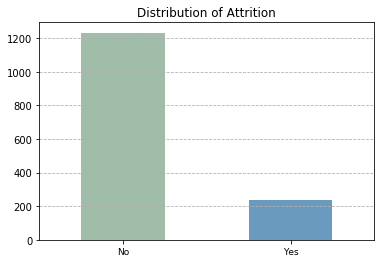

In [4]:
df.Attrition.value_counts().plot(kind='bar', color=['#77A285', '#2D70A4'], alpha=0.7)
plt.xticks(fontsize=9, rotation=0)
plt.grid(b=True, which='major', axis='y', linestyle='--')
plt.title('Distribution of Attrition')

### Unique values

We will cheque how many unique values in our dataframe to see if we can drop any usless columns

In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Drop columns

'EmployeeCount', 'Over18', 'StandardHours' have only one unique value and 'EmployeeNumber' has 1470 unique values. As these features are not useful for us, we will drop this columns.

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'MonthlyRate', 
         'HourlyRate', 'DailyRate', 'PercentSalaryHike', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'], axis="columns", inplace=True)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,2,Female,3,2,...,3,1,0,8,0,1,6,4,0,5
1,32,Yes,Travel_Frequently,Research & Development,16,1,2,Female,1,1,...,4,2,0,10,5,3,10,2,6,7
2,33,No,Travel_Frequently,Research & Development,3,4,4,Female,3,1,...,3,3,0,8,3,3,8,7,3,0
3,59,No,Travel_Rarely,Research & Development,3,3,3,Female,4,1,...,4,1,3,12,3,2,1,0,0,0
4,29,No,Travel_Rarely,Research & Development,15,2,4,Female,2,2,...,3,4,0,10,3,3,9,5,0,8


### Label Encoding

Few algorithms can handle categorical values very well but most of the algorithms work better with numerical inputs. Therefore, is also better to convert text/categorical data into numerical data in order to allow an algorithm/model to make sense out of it.

In [8]:
df.loc[df['Attrition'] == 'No', 'Attrition'] = 0
df.loc[df['Attrition'] == 'Yes', 'Attrition'] = 1
df['Attrition'] = df['Attrition'].astype('float')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,Travel_Rarely,Sales,1,2,2,Female,3,2,...,3,1,0,8,0,1,6,4,0,5
1,32,1.0,Travel_Frequently,Research & Development,16,1,2,Female,1,1,...,4,2,0,10,5,3,10,2,6,7
2,33,0.0,Travel_Frequently,Research & Development,3,4,4,Female,3,1,...,3,3,0,8,3,3,8,7,3,0
3,59,0.0,Travel_Rarely,Research & Development,3,3,3,Female,4,1,...,4,1,3,12,3,2,1,0,0,0
4,29,0.0,Travel_Rarely,Research & Development,15,2,4,Female,2,2,...,3,4,0,10,3,3,9,5,0,8


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


df['Gender'] = le.fit_transform(df['Gender'].astype(str))
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'].astype(str))
df['Department'] = le.fit_transform(df['Department'].astype(str))

In [10]:
le.classes_

array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2,2,1,2,2,0,3,2,...,3,1,0,8,0,1,6,4,0,5
1,32,1.0,1,1,16,1,2,0,1,1,...,4,2,0,10,5,3,10,2,6,7
2,33,0.0,1,1,3,4,4,0,3,1,...,3,3,0,8,3,3,8,7,3,0
3,59,0.0,2,1,3,3,3,0,4,1,...,4,1,3,12,3,2,1,0,0,0
4,29,0.0,2,1,15,2,4,0,2,2,...,3,4,0,10,3,3,9,5,0,8


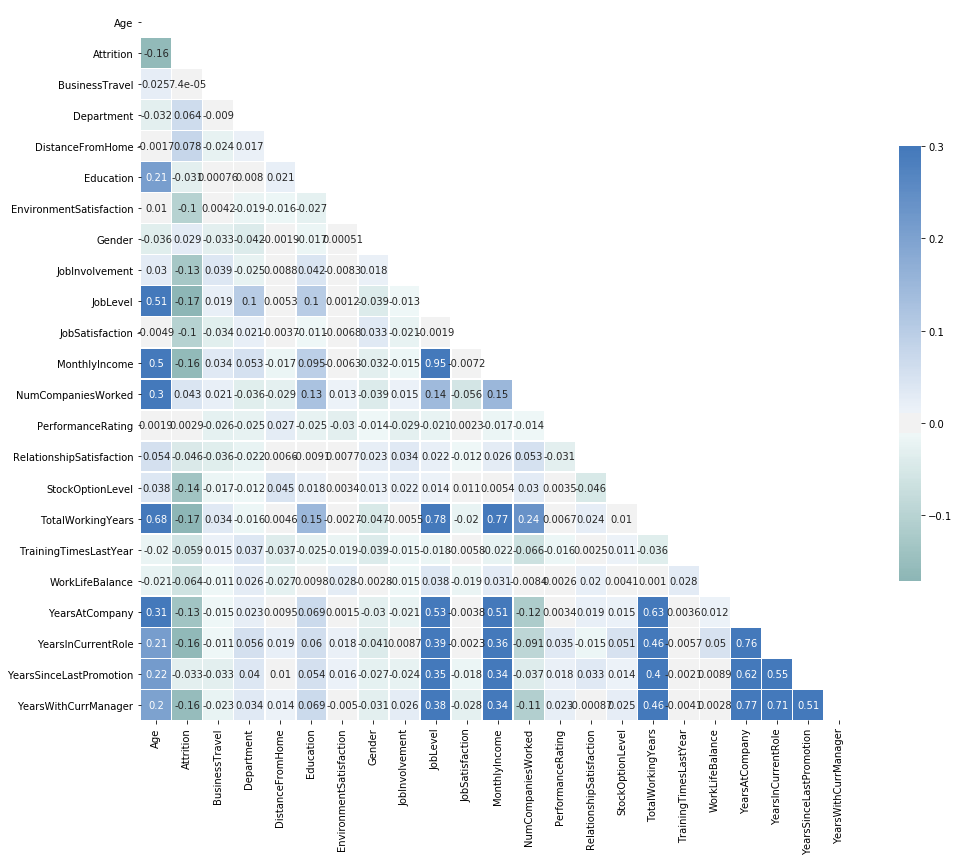

In [12]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 250,center="light", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot = True, cbar_kws={"shrink": .5})

In [13]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

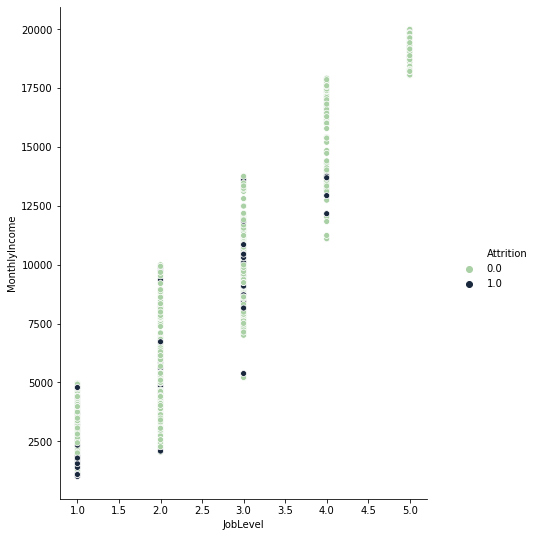

In [14]:
fig0 = sns.relplot(data=df, x="JobLevel", y="MonthlyIncome", hue="Attrition", palette="ch:r=-.5,l=.75")
fig0.fig.set_figwidth(8)
fig0.fig.set_figheight(8)

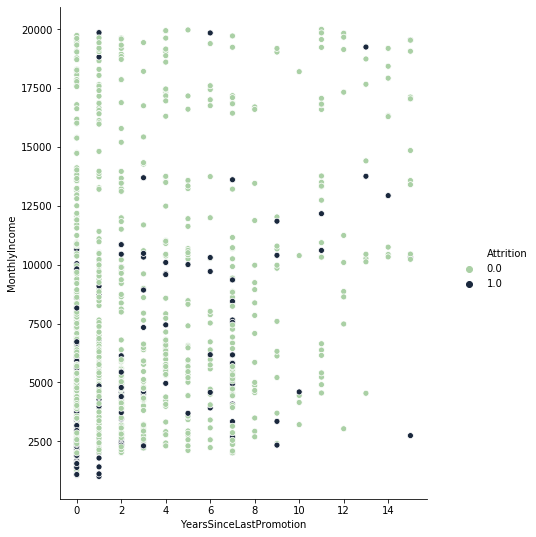

In [15]:
fig1 = sns.relplot(data=df, x="YearsSinceLastPromotion", y="MonthlyIncome", hue="Attrition", palette="ch:r=-.5,l=.75")
fig1.fig.set_figwidth(8)
fig1.fig.set_figheight(8)

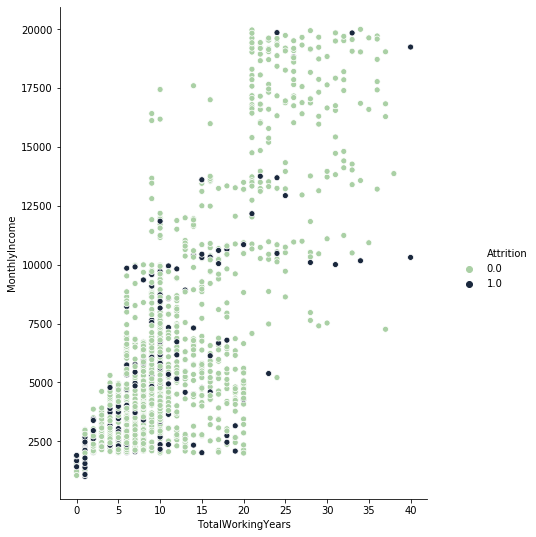

In [16]:
fig2 = sns.relplot(data=df, x="TotalWorkingYears", y="MonthlyIncome", hue="Attrition", palette="ch:r=-.5,l=.75")
fig2.fig.set_figwidth(8)
fig2.fig.set_figheight(8)

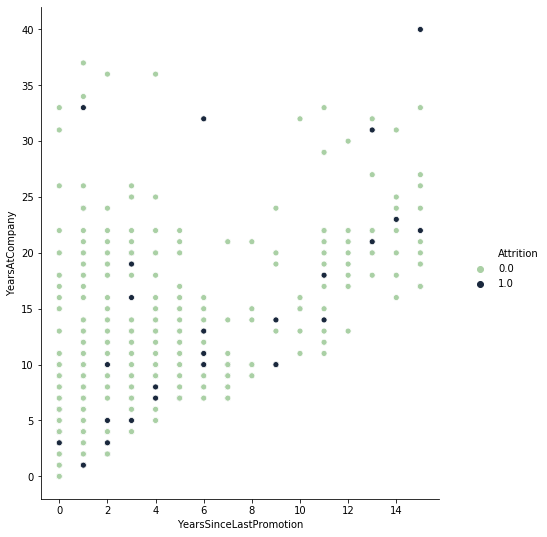

In [17]:
fig3 = sns.relplot(data=df, x="YearsSinceLastPromotion", y="YearsAtCompany", hue="Attrition", palette="ch:r=-.5,l=.75")
fig3.fig.set_figwidth(8)
fig3.fig.set_figheight(8)

In [18]:
pd.cut(df['MonthlyIncome'], bins=4).value_counts()


(990.01, 5756.5]      885
(5756.5, 10504.0]     338
(15251.5, 19999.0]    132
(10504.0, 15251.5]    115
Name: MonthlyIncome, dtype: int64

In [19]:
# Create bins
bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]

# Create labels for bins
label = ['1000-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7001-8000', '8001-9000', '9001-10000', '10000+']

df['MonthlyIncomeBins'] = pd.cut(df['MonthlyIncome'], bins, labels=label)

# Create Dataframe
summary = df.groupby("MonthlyIncomeBins")

# Create new columns with data
index = df.index
df['TotEmployees'] = index.value_counts()


df['% AttritionCluster'] = (df['Attrition'] / df['TotEmployees']) * 100

df['% TotalAttrition'] = (df['Attrition'] / df['Attrition'].sum()) * 100


summary = summary[['TotEmployees', 'Attrition', '% AttritionCluster', '% TotalAttrition']]
summary.sum()

,TotEmployees,Attrition,% AttritionCluster,% TotalAttrition
MonthlyIncomeBins,,,,
1000-2000,33,18.0,1800.0,7.594937
2001-3000,362,95.0,9500.0,40.084388
3001-4000,148,24.0,2400.0,10.126582
4001-5000,206,26.0,2600.0,10.970464
5001-6000,165,16.0,1600.0,6.751055
6001-7000,121,11.0,1100.0,4.641350
7001-8000,54,7.0,700.0,2.953586
8001-9000,48,6.0,600.0,2.531646
9001-10000,52,9.0,900.0,3.797468


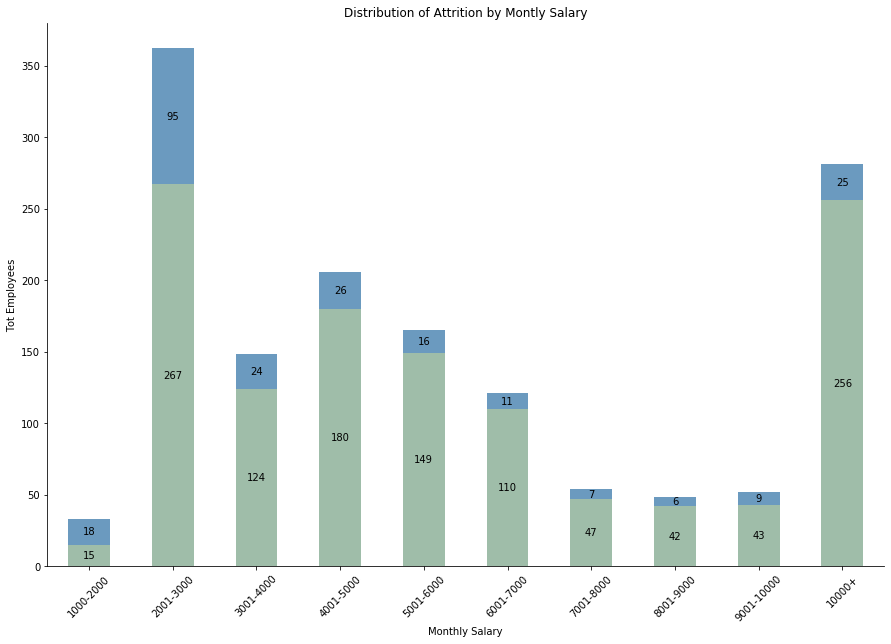

In [20]:
ms = df.groupby(['MonthlyIncomeBins','Attrition']).size().unstack().plot(kind='bar', color=['#77A285', '#2D70A4'], 
            alpha=0.7,  stacked=True, legend=False, figsize=(15, 10))

for p in ms.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ms.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.xticks(rotation=45)
plt.xlabel('Monthly Salary')
plt.ylabel('Tot Employees')
plt.title('Distribution of Attrition by Montly Salary')

ms.spines['top'].set_visible(False)
ms.spines['right'].set_visible(False)
plt.grid(b=False, which='major', axis='y', linestyle='')

In [21]:
pd.cut(df['TotalWorkingYears'], bins=12).value_counts()

(6.667, 10.0]       482
(3.333, 6.667]      276
(-0.04, 3.333]      165
(10.0, 13.333]      120
(16.667, 20.0]      112
(13.333, 16.667]    108
(20.0, 23.333]       77
(23.333, 26.667]     46
(26.667, 30.0]       38
(30.0, 33.333]       25
(33.333, 36.667]     14
(36.667, 40.0]        7
Name: TotalWorkingYears, dtype: int64

In [22]:
# Create bins
bins = [-1, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 40]

# Create labels for bins
label = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-10', '21-23',  '24-26', '27-29', '30-32', '33+']

df['TotWorkingYearsBins'] = pd.cut(df['TotalWorkingYears'], bins, labels=label)

# Create Dataframe
summary1 = df.groupby("TotWorkingYearsBins")

# Create new columns with data
index = df.index
df['TotEmployees'] = index.value_counts()

df['% AttritionCluster'] = (df['Attrition'] / df['TotEmployees'].sum()) * 100

df['% TotalAttrition'] = (df['Attrition'] / df['Attrition'].sum()) * 100


summary1 = summary1[['TotEmployees', 'Attrition', '% AttritionCluster', '% TotalAttrition']]
summary1.sum()

,TotEmployees,Attrition,% AttritionCluster,% TotalAttrition
TotWorkingYearsBins,,,,
0-2,123,54.0,3.673469,22.784810
3-5,193,37.0,2.517007,15.611814
6-8,309,56.0,3.809524,23.628692
9-11,334,42.0,2.857143,17.721519
12-14,115,12.0,0.816327,5.063291
15-17,110,11.0,0.748299,4.641350
18-10,79,9.0,0.612245,3.797468
21-23,77,5.0,0.340136,2.109705
24-26,46,5.0,0.340136,2.109705


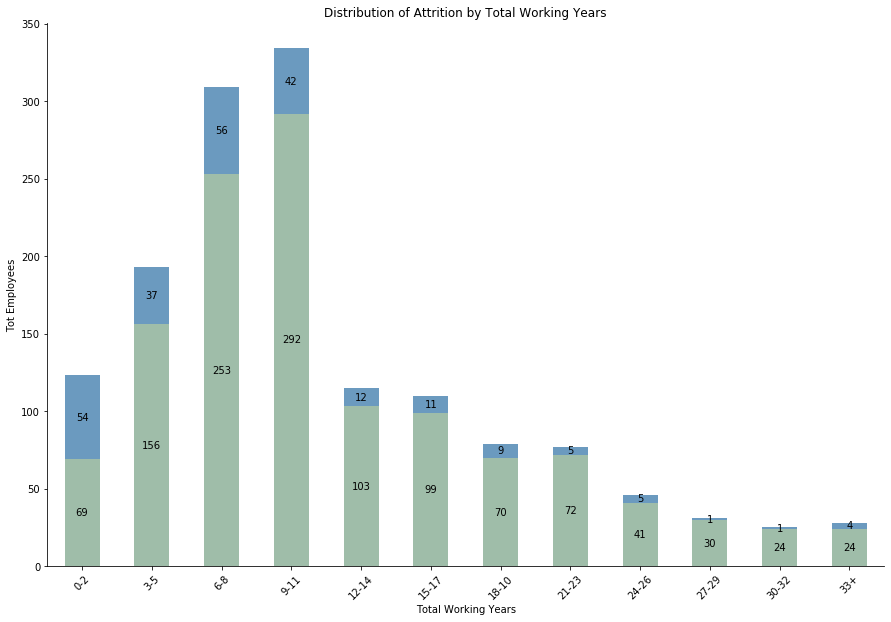

In [23]:
ycr = df.groupby(['TotWorkingYearsBins','Attrition']).size().unstack().plot(kind='bar', color=['#77A285', '#2D70A4'], 
            alpha=0.7,  stacked=True, legend=False, figsize=(15, 10))

for p in ycr.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ycr.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    

plt.xlabel('Total Working Years')
plt.ylabel('Tot Employees')
plt.title('Distribution of Attrition by Total Working Years')
plt.xticks(rotation=45)

ycr.spines['top'].set_visible(False)
ycr.spines['right'].set_visible(False)
plt.grid(b=False, which='major', axis='y', linestyle='')

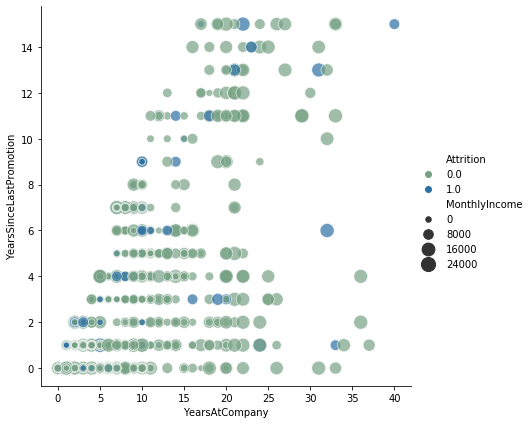

In [24]:
sns.relplot(x='YearsAtCompany', y='YearsSinceLastPromotion', hue='Attrition', size='MonthlyIncome',
            sizes=(30, 200), alpha=.7, palette=['#77A285', '#2D70A4'],
            height=6, data=df)

## Model Selection

In [25]:
# Splitting the data in TRAIN and TEST 

from sklearn.model_selection import train_test_split

df.drop(['TotEmployees','% AttritionCluster', '% TotalAttrition', 'TotWorkingYearsBins', 'MonthlyIncomeBins'], axis="columns", inplace=True)

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1029, 22)
Number transactions y_train dataset:  (1029,)
Number transactions X_test dataset:  (441, 22)
Number transactions y_test dataset:  (441,)


In [27]:
X_train.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
714,51,2,1,1,3,3,1,3,1,4,...,3,2,0,1,0,2,1,0,0,0
135,37,2,1,11,2,1,0,1,2,2,...,3,1,0,15,2,1,1,0,0,0
1271,25,1,1,2,1,4,1,4,2,3,...,3,3,2,7,6,3,7,7,0,7
477,36,2,1,12,4,3,0,3,2,3,...,3,2,2,7,2,3,3,2,1,1
806,35,2,2,1,3,2,1,3,2,3,...,3,3,0,15,2,3,11,9,6,9


### Logistic Regression

In [28]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.823


/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


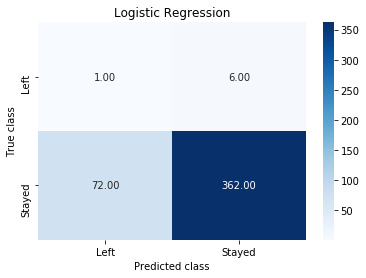

In [30]:
#Confusion Matrix for Logistic Regression
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"], cmap='Blues' )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [31]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90       368
         1.0       0.14      0.01      0.03        73

    accuracy                           0.82       441
   macro avg       0.49      0.50      0.46       441
weighted avg       0.72      0.82      0.76       441



### Random Forest

In [32]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.834


/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


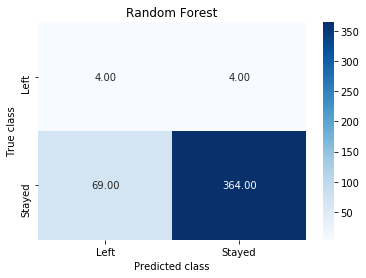

In [34]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"], cmap='Blues' )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [35]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       368
         1.0       0.50      0.05      0.10        73

    accuracy                           0.83       441
   macro avg       0.67      0.52      0.50       441
weighted avg       0.78      0.83      0.77       441



### Support Vector Machine (SVM)

In [36]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [37]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.834


/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


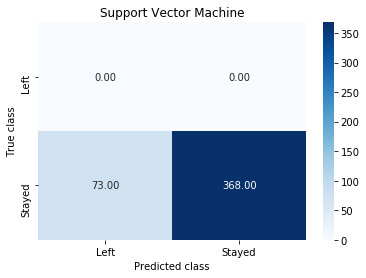

In [38]:
#Confusion Matrix for SVM
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"], cmap='Blues' )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [39]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       368
         1.0       0.00      0.00      0.00        73

    accuracy                           0.83       441
   macro avg       0.42      0.50      0.45       441
weighted avg       0.70      0.83      0.76       441



/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
